In [2]:
# Importación de librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from model import Data

In [3]:
CLEAN_ROUTE = './sample_data/clean_data.csv'
clean_data : pd.DataFrame = pd.read_csv(CLEAN_ROUTE)

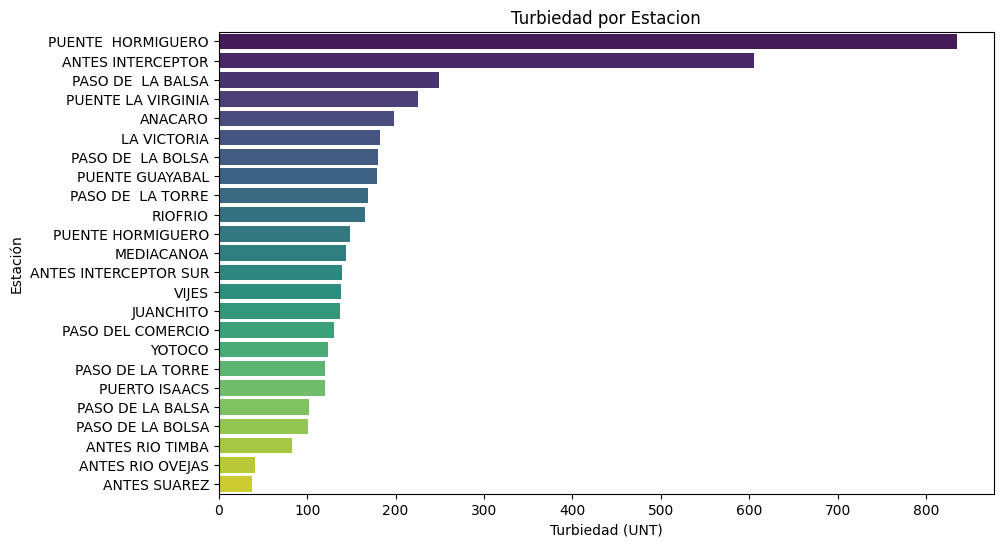

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_turbidity = clean_data.groupby('estaciones')['turbiedad_unt'].mean().reset_index()
avg_turbidity_sorted = avg_turbidity.sort_values(by='turbiedad_unt', ascending=False)  # Orden descendente

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='turbiedad_unt', y='estaciones', data=avg_turbidity_sorted, hue='estaciones', palette='viridis', legend=False)
plt.title('Turbiedad por Estacion')
plt.xlabel('Turbiedad (UNT)')
plt.ylabel('Estación')
plt.show()


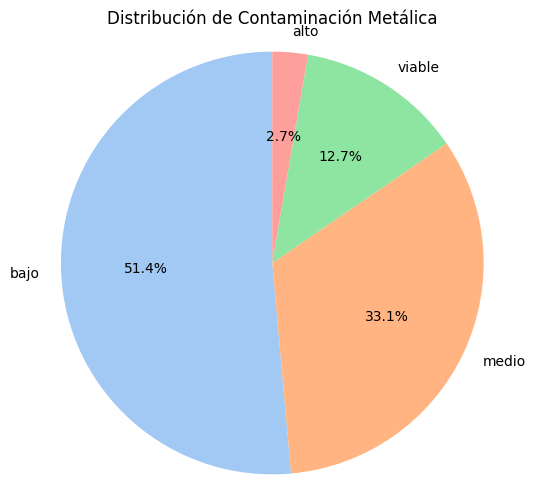

In [5]:
contaminacion_counts = clean_data['contaminacion_metalica'].value_counts()

# Grafica Circular
plt.figure(figsize=(6, 6))
plt.pie(contaminacion_counts, labels=contaminacion_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribución de Contaminación Metálica')
plt.axis('equal')
plt.show()

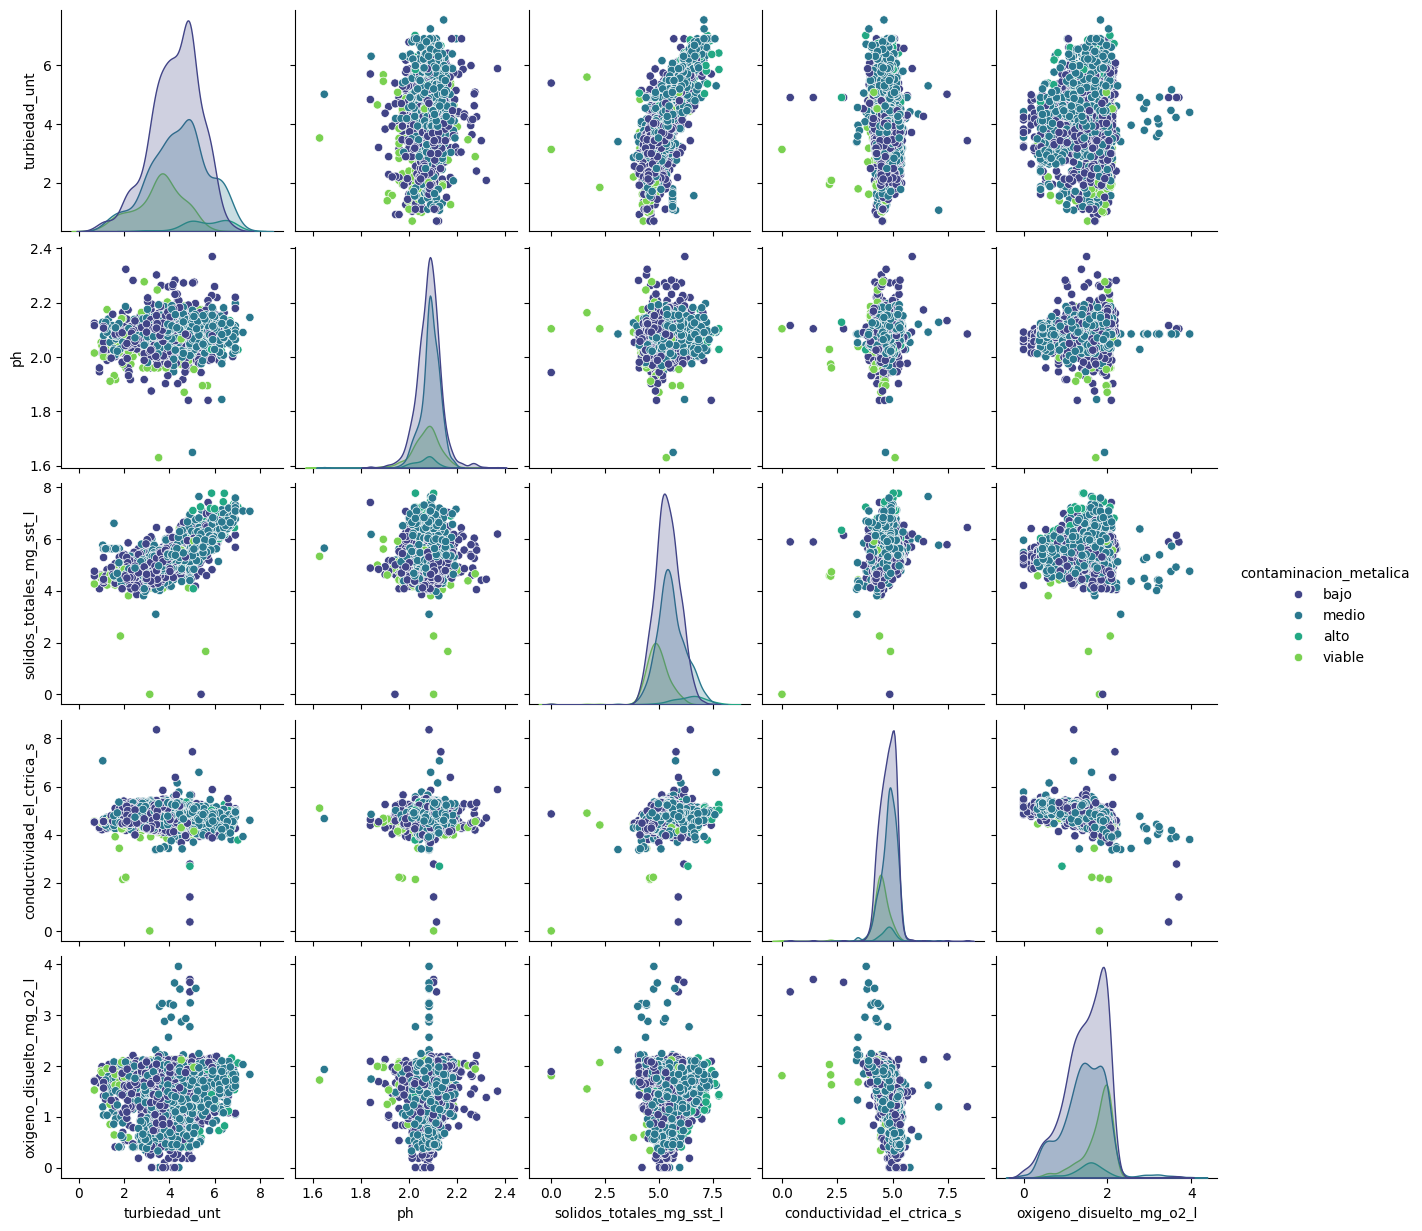

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona las columnas deseadas para el análisis
selected_columns = [Data.TURBIEDAD_UNT, Data.PH, Data.SOLIDOS_TOTALES_MG_SST_L,
                    Data.CONDUCTIVIDAD_EL_CTRICA_S, Data.OXIGENO_DISUELTO_MG_O2_L]

# Aplica el escalamiento logarítmico a las columnas seleccionadas
log_scaled_data = clean_data[selected_columns].apply(np.log1p)  # np.log1p(x) es equivalente a log(1 + x)

# Añade la columna de estaciones para el hue
log_scaled_data[Data.CONTAMINACION_METALICA] = clean_data[Data.CONTAMINACION_METALICA]

# Crear el pairplot con los datos escalados logarítmicamente y categorizados por estaciones
sns.pairplot(log_scaled_data, diag_kind='kde', hue=Data.CONTAMINACION_METALICA, palette='viridis')

# Mostrar el gráfico
plt.show()

Acá entonces fue que nos dimos cuenta que podíamos empezar a aplicar criterios de clasificación en base a la contaminación así como en nuestro proyecto de investigación, no obstante puesto por estación no parece haber una representación significativa de los datos buscamos por otros lados (y eventualmente empezamos encontramos por el lado de la contaminación metálica)

In [ ]:
clean_data.columns
'''
'nitritos_mg_n_no2_l', 'nitratos_mg_n_no3_l',
'cloruros_mg_cl_l', 'fosforo_total_mg_p_l',
'fosfatos_mg_po4_l', 'sulfatos_mg_so4_l'
'''

Index(['fecha_de_muestreo', 'estaciones', 'ph', 'temperatura_c', 'color_upc',
       'turbiedad_unt', 'solidos_totales_mg_sst_l',
       'solidos_suspendidos_totales', 'solidos_disueltos_mg_sd_l',
       'demanda_bioquimica_de_oxigeno', 'demanda_quimica_de_oxigeno',
       'oxigeno_disuelto_mg_o2_l', 'dureza_total_mg_caco3_l',
       'dureza_calcica_mg_caco3_l', 'dureza_magnesica_mg_caco3',
       'calcio_mg_ca_l', 'magnesio_mg_mg_l', 'alcalinidad_total_mg_caco3',
       'bicarbonatos_mg_caco3_l', 'conductividad_el_ctrica_s',
       'hierro_total_mg_fe_l', 'manganeso_total_mg_mn_l',
       'sodio_total_mg_na_l', 'potasio_total_mg_k_l', 'cobre_total_mg_cu_l',
       'zinc_total_mg_zn_l', 'nitrogeno_total_mg_n_l',
       'nitrogeno_amoniacal_mg_n', 'nitritos_mg_n_no2_l',
       'nitratos_mg_n_no3_l', 'cloruros_mg_cl_l', 'fosforo_total_mg_p_l',
       'fosfatos_mg_po4_l', 'sulfatos_mg_so4_l', 'cadmio_total_mg_cd_l',
       'cromo_total_mg_cr_l', 'niquel_total_mg_ni_l', 'plomo_total_mg_pb_

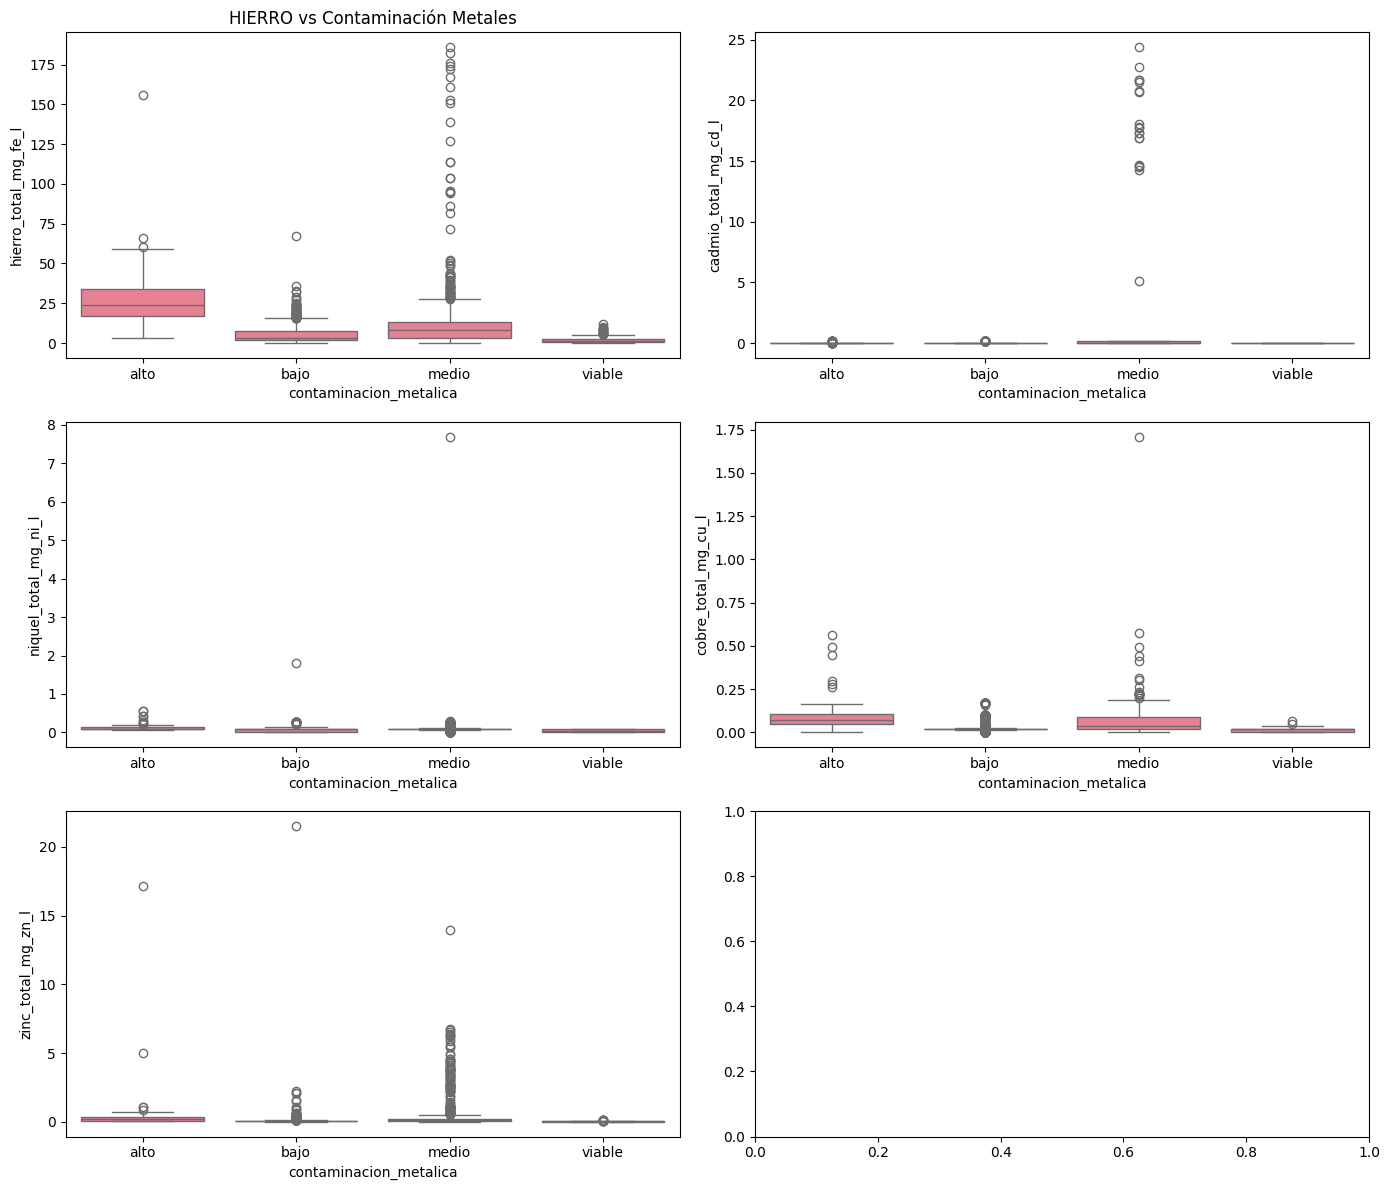

In [ ]:
# Aplicar una paleta de colores personalizada
sns.set_palette("husl")  # "husl" es una paleta de colores vibrante, pero puedes probar con otras como "Set2", "pastel", etc.

# Convert the target variable to a categorical type for better plotting
clean_data[Data.CONTAMINACION_METALICA] = clean_data[Data.CONTAMINACION_METALICA].astype('category')

# Set up the plotting area
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# HIERRO vs CONTAMINACION_METALICA
axes[0, 0].set_title('HIERRO vs Contaminación Metales')

metales = [Data.HIERRO_TOTAL_MG_FE_L, Data.CADMIO_TOTAL_MG_CD_L, Data.NIQUEL_TOTAL_MG_NI_L, Data.COBRE_TOTAL_MG_CU_L, Data.ZINC_TOTAL_MG_ZN_L]

for i, metal in enumerate(metales):
    sns.boxplot(ax=axes[i//2, i%2], x=Data.CONTAMINACION_METALICA, y=metal, data=clean_data)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()
